## Uploading the Iris dataset provided

In [1]:
from google.colab import files
upload=files.upload()

Saving Iris.csv to Iris.csv


## Importing pandas and reading the dataset

In [110]:
import pandas as pd

In [111]:
iris=pd.read_csv("Iris.csv")

In [112]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Accessing column names

In [113]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Extracting Features to predict Labels and Visualize the Decision Tree Classifier

In [114]:
x=iris.iloc[:,[1,2,3,4]]
x


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
x.loc[[130]]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,7.4,2.8,6.1,1.9


In [117]:
y=iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Label Encoding the 'Species' column to fit it into the algorithm

In [118]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

iris['Species']= label_encoder.fit_transform(iris['Species'])
  
iris['Species'].unique()

array([0, 1, 2])

In [119]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [120]:
y=iris.Species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## Preparing the Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [122]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## Visulazing the decision tree using graphviz

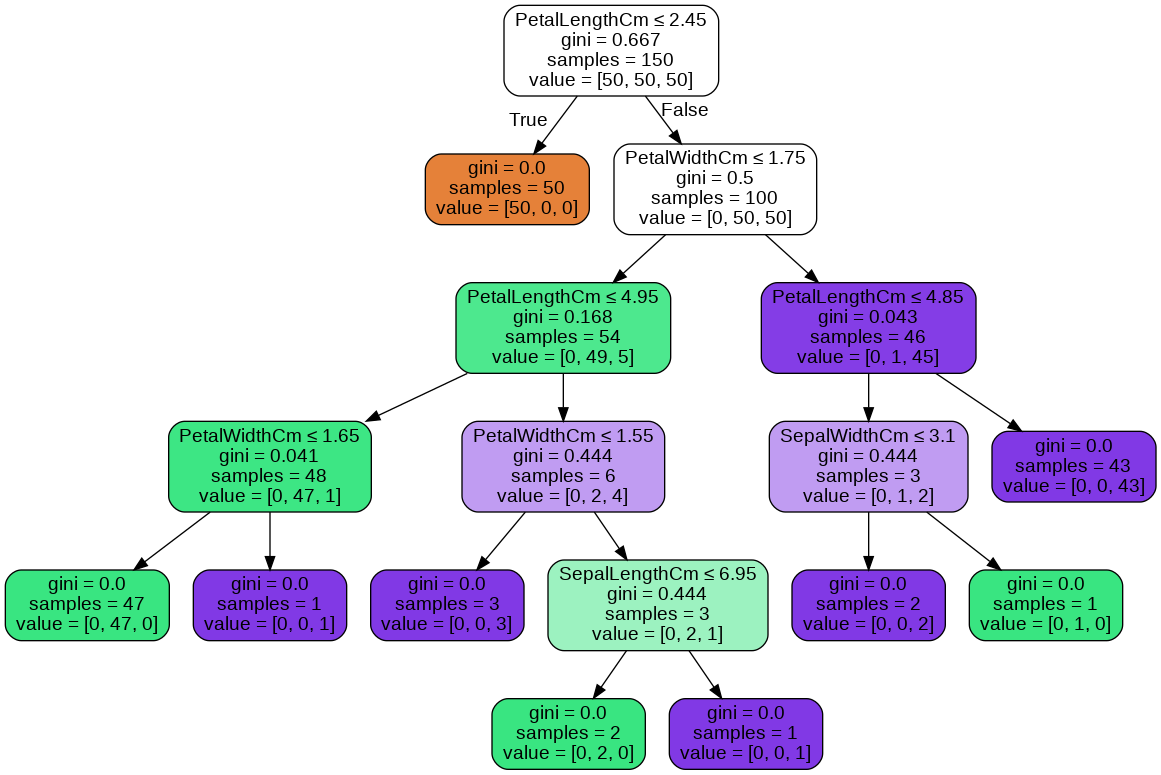

In [123]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Predicting labels by giving features as input

In [133]:
sl,sw,pl,pw=input().split()
pred=dtree.predict([[sl,sw,pl,pw]])
#print(pred.item())
i=pred.item()
#print(i)
l=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print("It belongs to {} class".format(l[i]))

7.4	2.8	6.1	1.9
It belongs to Iris-virginica class
